In [ ]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

with open('/content/drive/MyDrive/esg.json', 'r') as json_file:
    esg_data = json.load(json_file)

result_data = esg_data['esgChart']['result']
data = []

for item in result_data:
    peer_group = item['peerGroup']
    symbol_series = item['symbolSeries']
    timestamps = symbol_series['timestamp']
    esg_scores = symbol_series['esgScore']
    governance_scores = symbol_series['governanceScore']
    environment_scores = symbol_series['environmentScore']
    social_scores = symbol_series['socialScore']

    for i in range(len(timestamps)):
        flat_item = {
            'peerGroup': peer_group,
            'timestamp': timestamps[i],
            'esgScore': esg_scores[i],
            'governanceScore': governance_scores[i],
            'environmentScore': environment_scores[i],
            'socialScore': social_scores[i]
        }
        data.append(flat_item)

df = pd.DataFrame(data)

df.to_csv('esg_dataset.csv', index=False)


In [ ]:
df

,peerGroup,timestamp,esgScore,governanceScore,environmentScore,socialScore
0,Software & Services,1409529600,66.00,63.00,78.00,59.00
1,Software & Services,1412121600,66.00,63.00,78.00,59.00
2,Software & Services,1414800000,66.00,63.00,78.00,59.00
3,Software & Services,1417392000,66.00,63.00,78.00,59.00
4,Software & Services,1420070400,66.00,63.00,78.00,59.00
...,...,...,...,...,...,...
91,Software & Services,1648771200,NaN,NaN,NaN,NaN
92,Software & Services,1651363200,13.75,5.23,0.46,8.06
93,Software & Services,1654041600,NaN,NaN,NaN,NaN
94,Software & Services,1656633600,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop('peerGroup', axis=1)

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')


In [ ]:
start_date = pd.Timestamp('2020-01-01')
end_date = pd.Timestamp('2023-08-25')

# Boolean indexing to select rows within the specified date range
mask = (df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)
df = df[mask]
df.reset_index(drop=True, inplace=True)

In [ ]:
df['date'] = df['timestamp'].dt.strftime('%m-%d-%Y')
df.drop('timestamp', axis=1, inplace=True)
df

<ipython-input-32-3846ebb91e70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['timestamp'].dt.strftime('%m-%d-%Y')
<ipython-input-32-3846ebb91e70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('timestamp', axis=1, inplace=True)


,esgScore,governanceScore,environmentScore,socialScore,date
0,15.35,5.19,0.44,9.71,01-01-2020
1,15.35,5.19,0.44,9.71,02-01-2020
2,15.55,5.24,0.44,9.87,03-01-2020
3,NaN,NaN,NaN,NaN,04-01-2020
4,NaN,NaN,NaN,NaN,05-01-2020
5,NaN,NaN,NaN,NaN,06-01-2020
6,14.91,5.07,0.47,9.37,07-01-2020
7,14.91,5.07,0.47,9.37,08-01-2020
8,NaN,NaN,NaN,NaN,09-01-2020
9,14.94,5.09,0.47,9.37,10-01-2020


In [ ]:
#Handling the missing errors
df = df.dropna()
df.dropna(inplace=True)
df.isnull().sum()


<ipython-input-33-fc5f04c70fc1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


esgScore            0
governanceScore     0
environmentScore    0
socialScore         0
date                0
dtype: int64

In [ ]:
df

,esgScore,governanceScore,environmentScore,socialScore,date
0,15.35,5.19,0.44,9.71,01-01-2020
1,15.35,5.19,0.44,9.71,02-01-2020
2,15.55,5.24,0.44,9.87,03-01-2020
6,14.91,5.07,0.47,9.37,07-01-2020
7,14.91,5.07,0.47,9.37,08-01-2020
9,14.94,5.09,0.47,9.37,10-01-2020
12,14.74,4.90,0.47,9.37,01-01-2021
13,14.74,4.90,0.47,9.37,02-01-2021
14,14.74,4.90,0.47,9.37,03-01-2021
16,14.63,4.83,0.42,9.37,05-01-2021


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 31
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   esgScore          14 non-null     float64
 1   governanceScore   14 non-null     float64
 2   environmentScore  14 non-null     float64
 3   socialScore       14 non-null     float64
 4   date              14 non-null     object 
dtypes: float64(4), object(1)
memory usage: 672.0+ bytes


In [ ]:
df.dtypes

esgScore            float64
governanceScore     float64
environmentScore    float64
socialScore         float64
date                 object
dtype: object

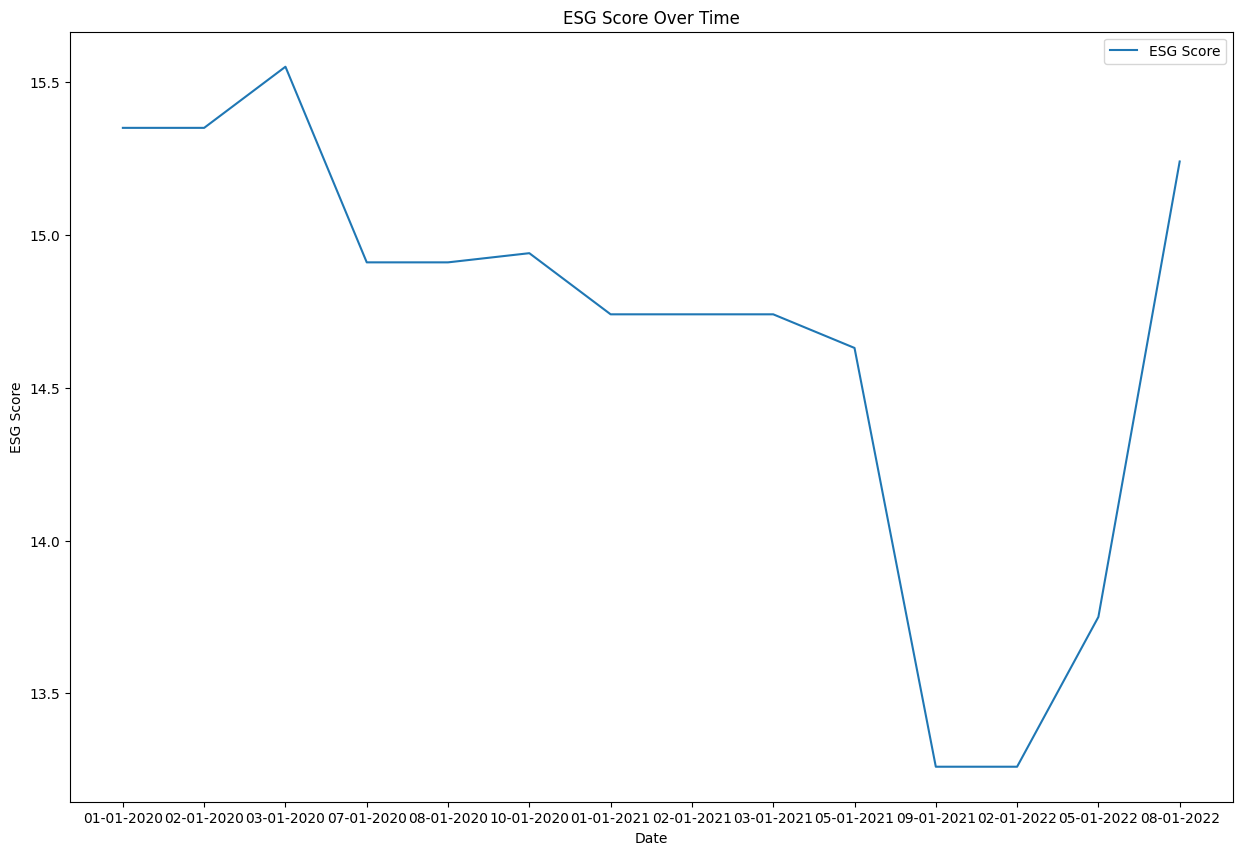

In [ ]:
#Plotting esg score
plt.figure(figsize=(15, 10))
plt.plot(df['date'], df['esgScore'], label='ESG Score')
plt.xlabel('Date')
plt.ylabel('ESG Score')
plt.title('ESG Score Over Time')
plt.legend()
plt.show()

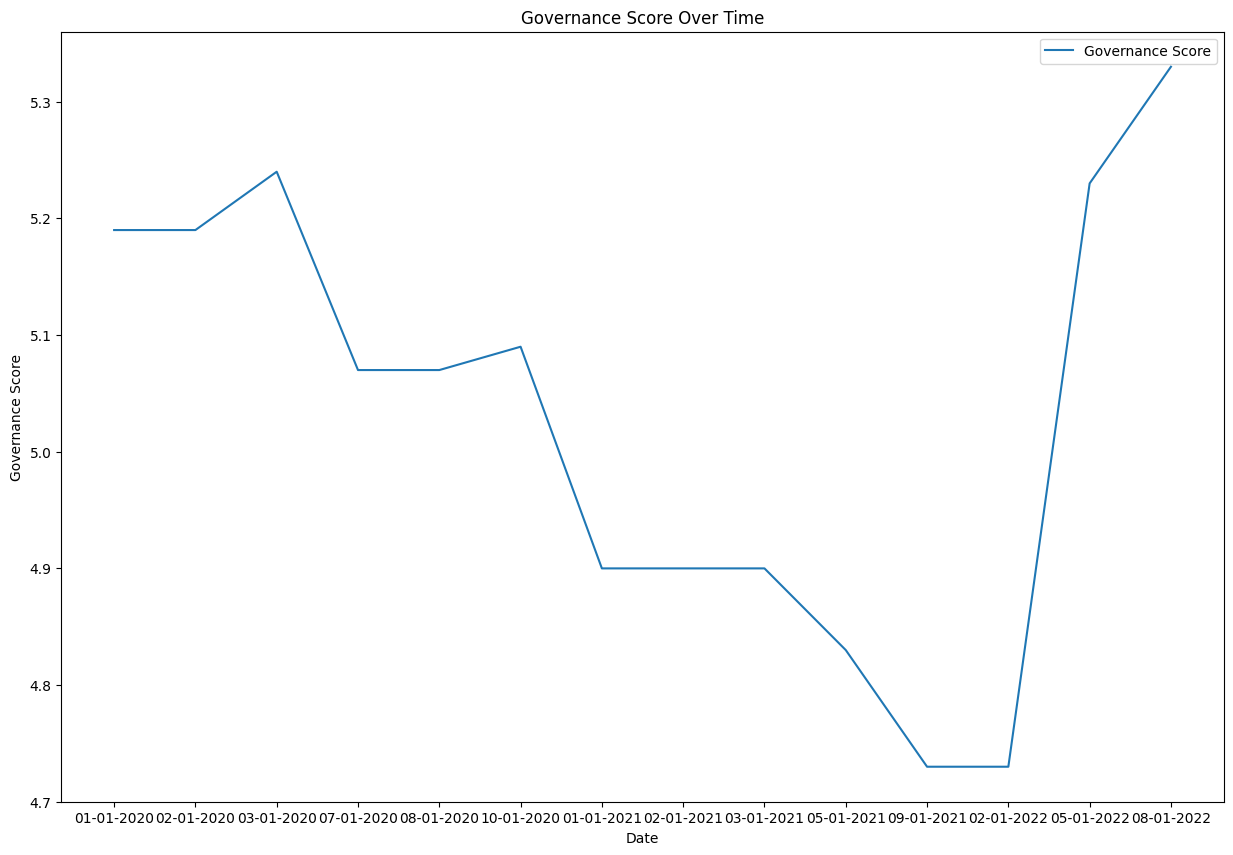

In [ ]:
#Plotting governance score
plt.figure(figsize=(15, 10))
plt.plot(df['date'], df['governanceScore'], label='Governance Score')
plt.xlabel('Date')
plt.ylabel('Governance Score')
plt.title('Governance Score Over Time')
plt.legend()
plt.show()

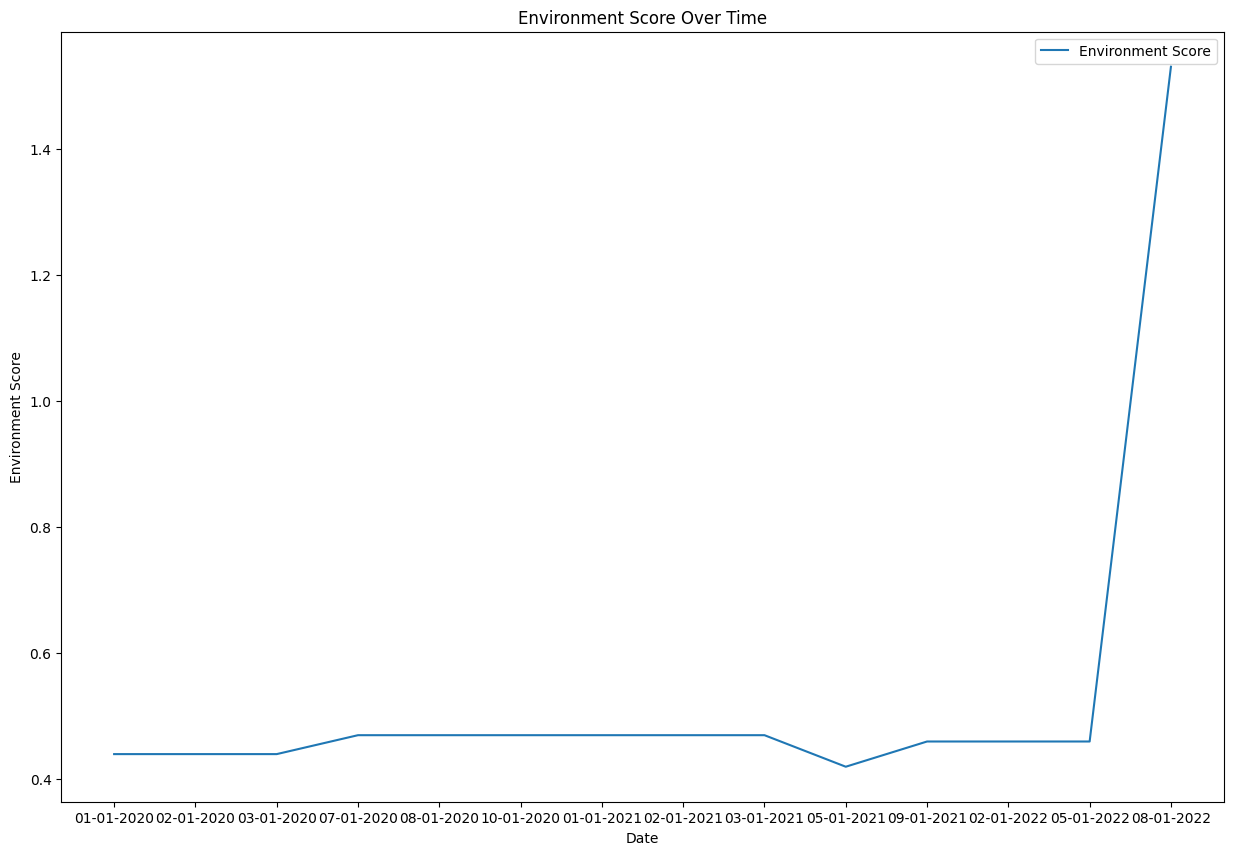

In [ ]:
#Plotting environment score
plt.figure(figsize=(15, 10))
plt.plot(df['date'], df['environmentScore'], label='Environment Score')
plt.xlabel('Date')
plt.ylabel('Environment Score')
plt.title('Environment Score Over Time')
plt.legend()
plt.show()

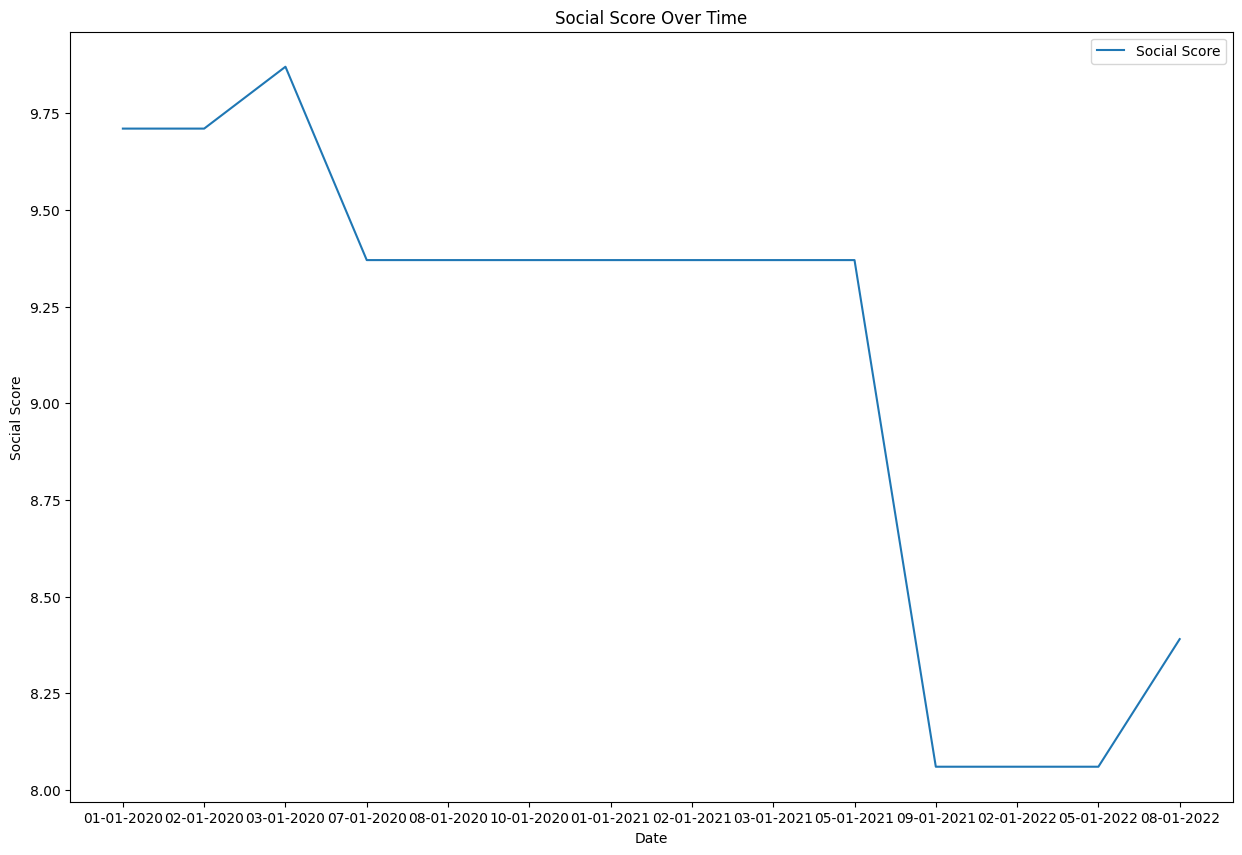

In [ ]:
#Plotting social score
plt.figure(figsize=(15, 10))
plt.plot(df['date'], df['socialScore'], label='Social Score')
plt.xlabel('Date')
plt.ylabel('Social Score')
plt.title('Social Score Over Time')
plt.legend()
plt.show()

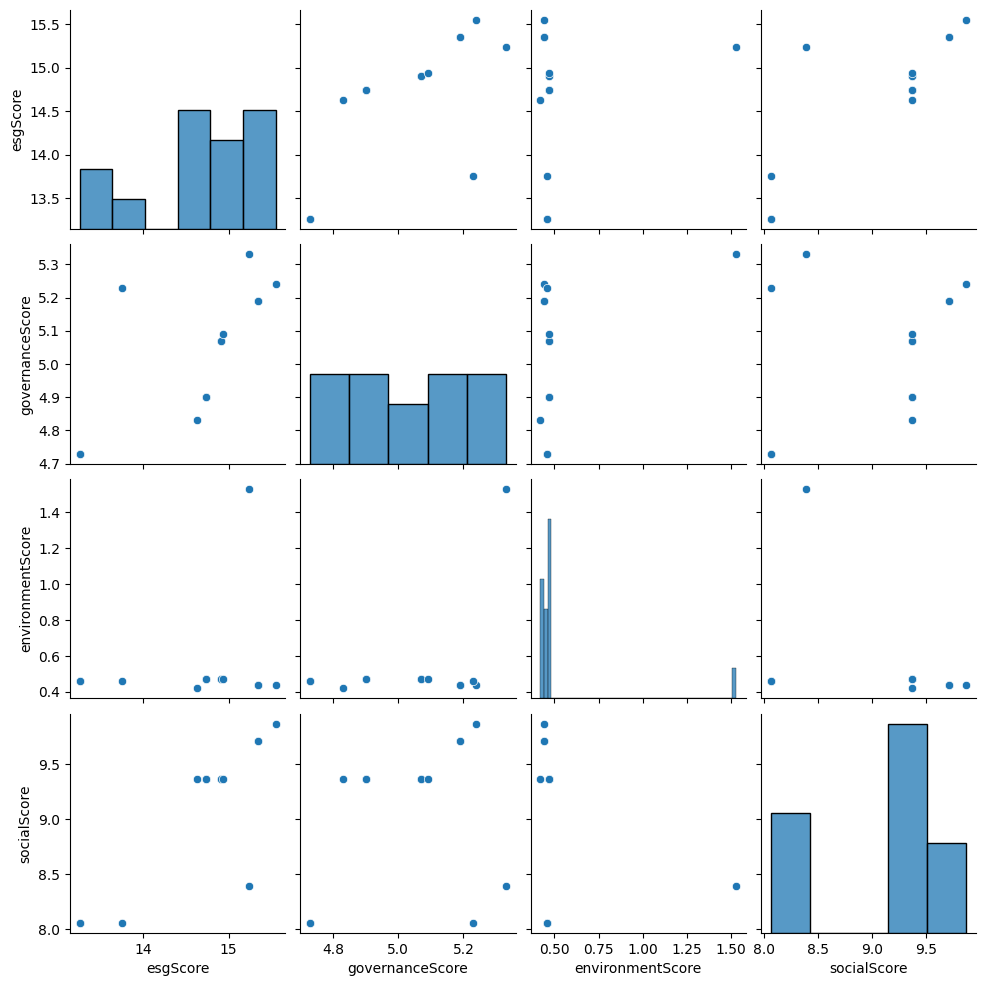

In [ ]:
sns.pairplot(df)

In [ ]:
esg_statistics=df.describe()
esg_statistics

,esgScore,governanceScore,environmentScore,socialScore
count,14.000000,14.000000,14.000000,14.000000
mean,14.669286,5.028571,0.533571,9.103571
std,0.736473,0.196659,0.287231,0.656103
min,13.260000,4.730000,0.420000,8.060000
25%,14.657500,4.900000,0.445000,8.635000
50%,14.825000,5.070000,0.465000,9.370000
75%,15.165000,5.190000,0.470000,9.370000
max,15.550000,5.330000,1.530000,9.870000


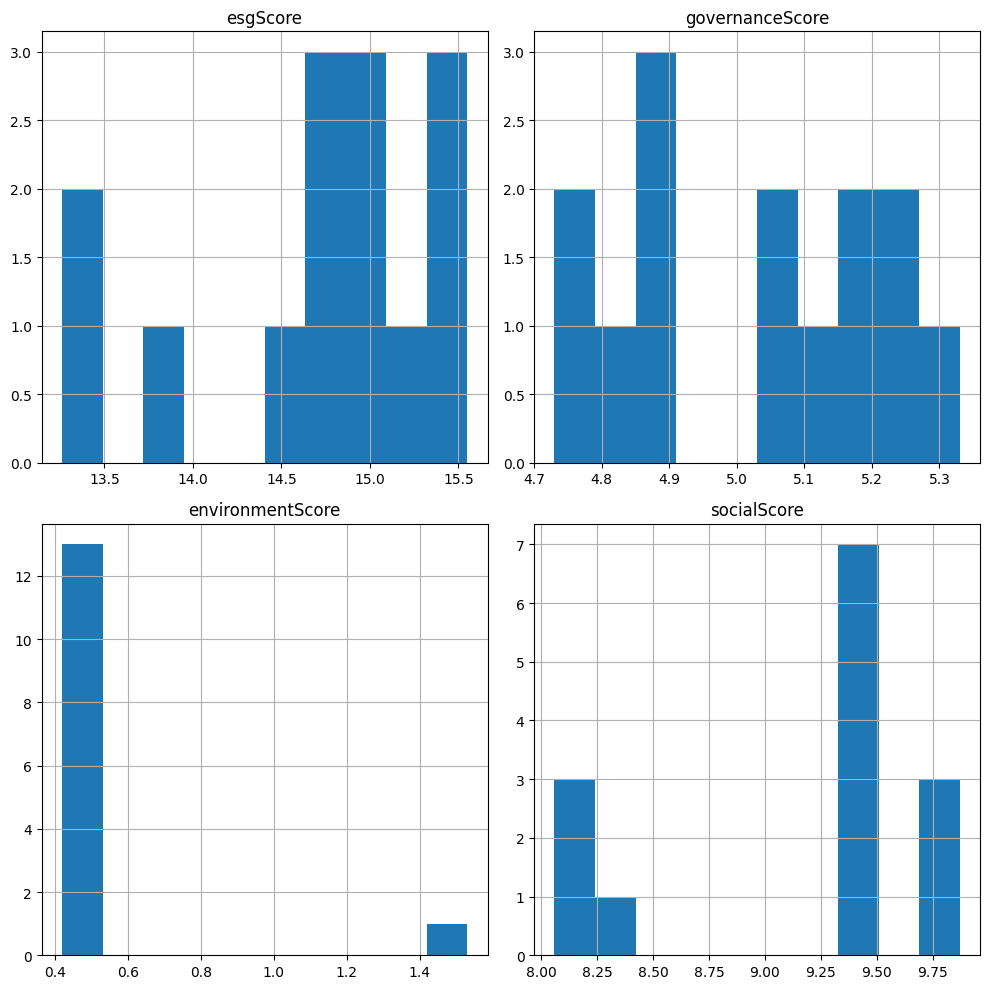

In [ ]:
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

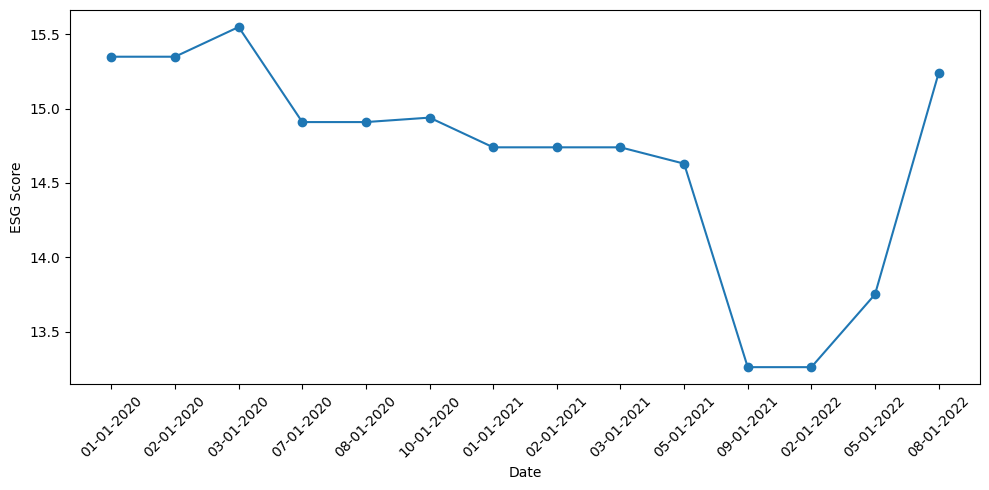

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['esgScore'], marker='o')
plt.xlabel('Date')
plt.ylabel('ESG Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

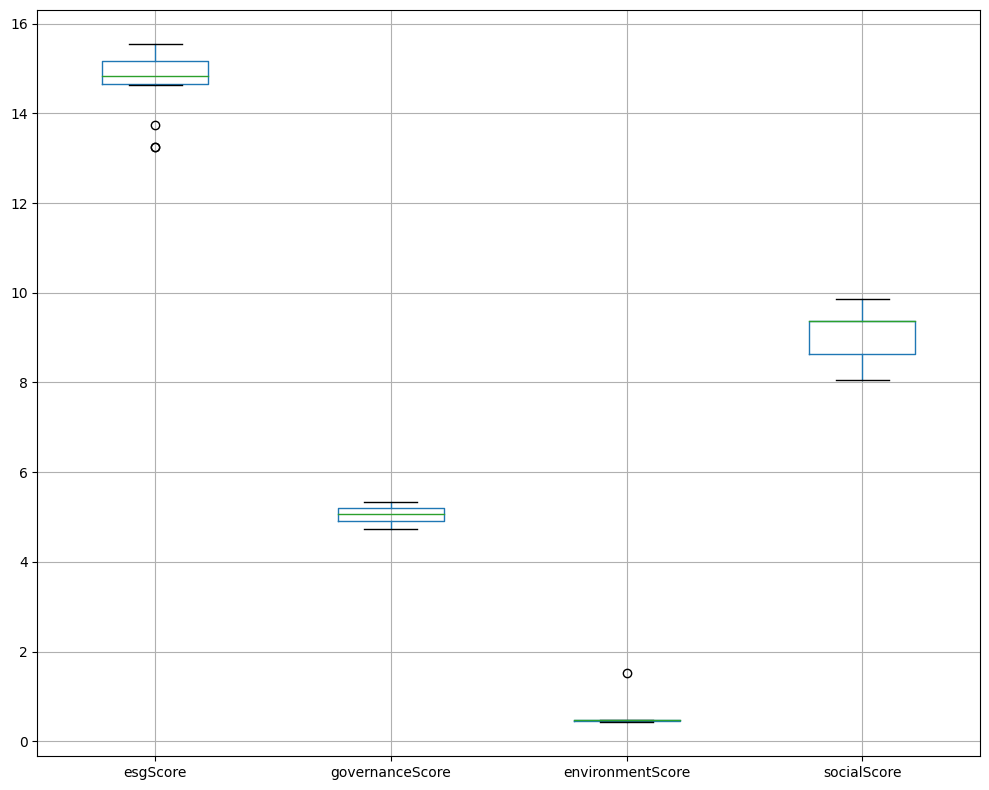

In [ ]:
df.boxplot(figsize=(10, 8))
plt.tight_layout()
plt.show()

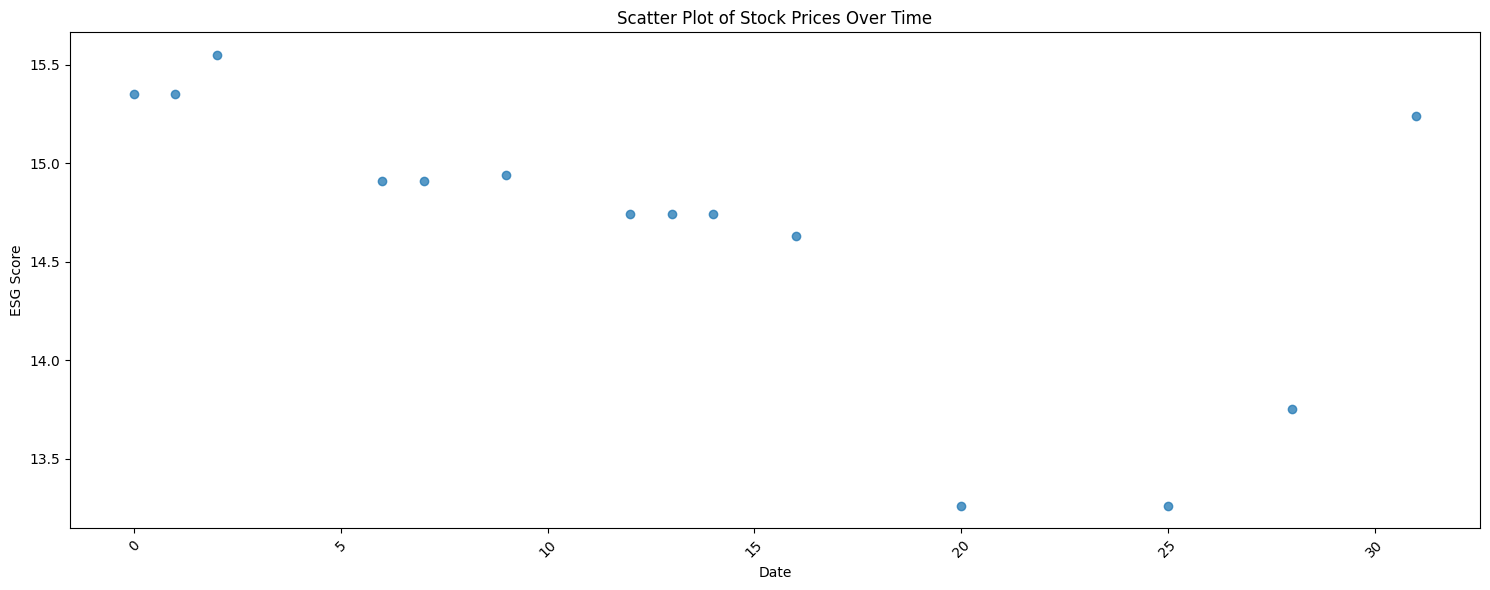

In [ ]:
fig = plt.figure(figsize=(15, 6))
plt.scatter(df.index, df['esgScore'], alpha=0.75)
plt.xlabel('Date')
plt.ylabel('ESG Score')
plt.title('Scatter Plot of Stock Prices Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: >

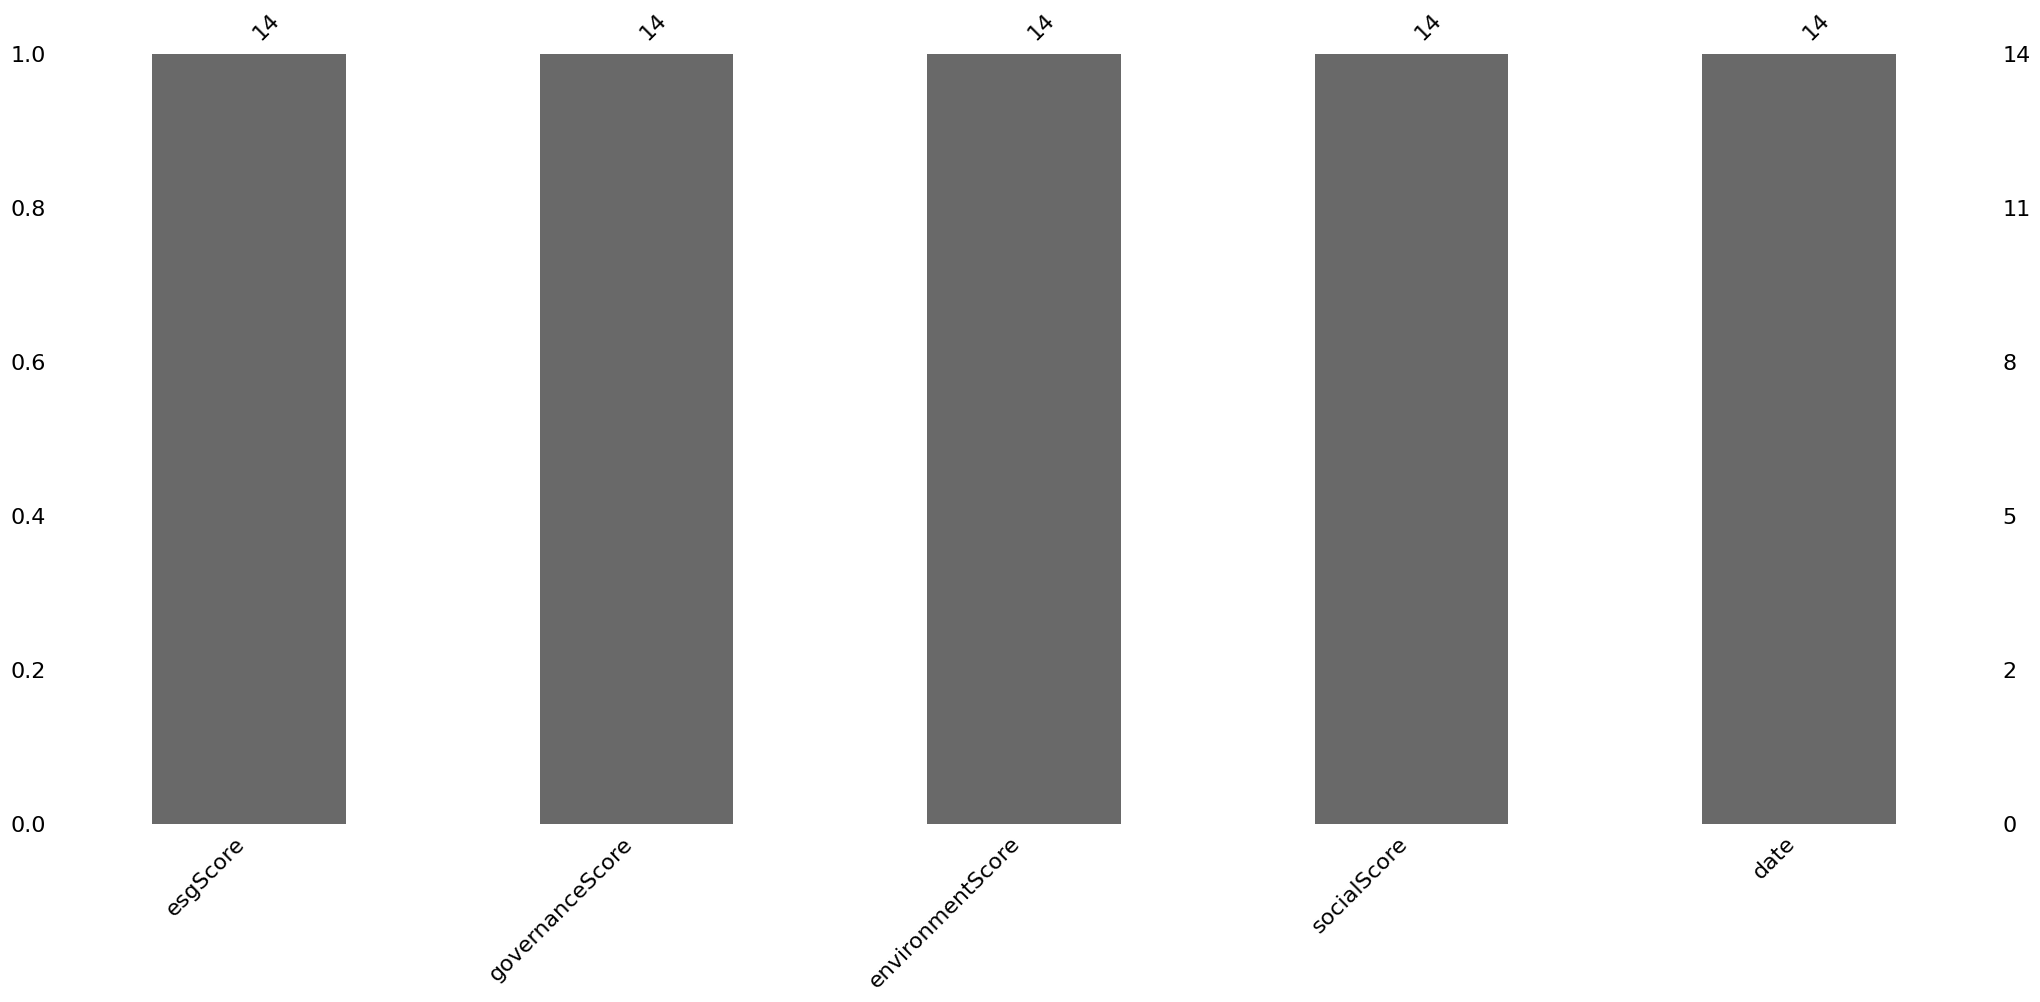

In [ ]:
import missingno as msno
msno.bar(df)

<ipython-input-48-9b639283758b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


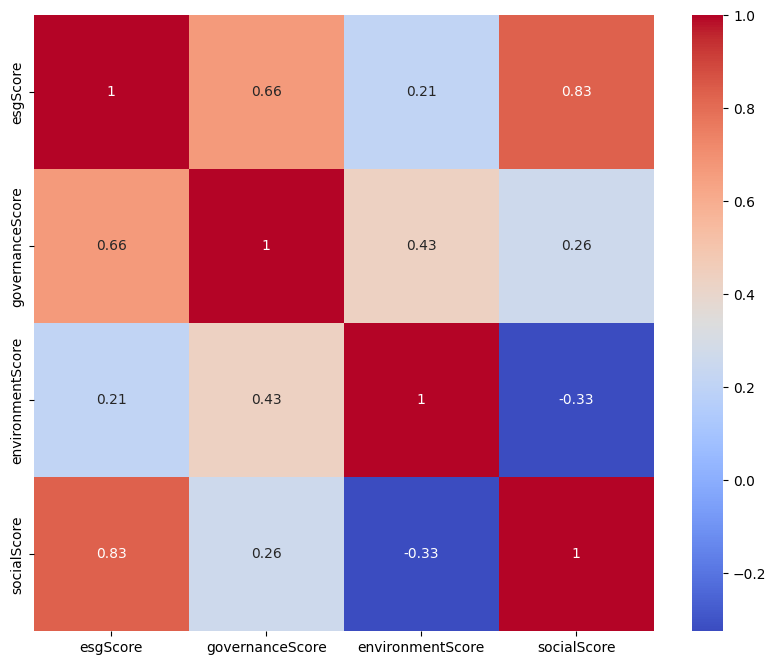

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/df_esg.csv', index=False)